# Import Librarires

In [ ]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import  Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor



In [ ]:
pd.pandas.set_option('display.max_columns', None)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Flight Price Prediction Notebook/Data_Train.csv',encoding='utf-8')


In [ ]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# **EDA and preprocessing**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##Handling Numerical Features

Checking for Null Values

Route and Total_Stops feature has 1 null value in each

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data.shape

(10683, 11)

In [ ]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Splitting Date_of_Journey into 3 separate columns and converting it into Integer dtypes

In [ ]:
#Date Column
data['Date']=data['Date_of_Journey'].str.split('/').str[0].astype(int)


data['Date'].head()

0    24
1     1
2     9
3    12
4     1
Name: Date, dtype: int64

In [ ]:
#Month Column
data['Month']=data['Date_of_Journey'].str.split('/').str[1].astype(int)
data['Month'].head()

0    3
1    5
2    6
3    5
4    3
Name: Month, dtype: int64

In [ ]:
#Year Column
data['Year']=data['Date_of_Journey'].str.split('/').str[2].astype(int)
data['Year'].head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: Year, dtype: int64

In [ ]:
data.head(5)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [ ]:
#Deleting Date_of_Journey Column
data=data.drop('Date_of_Journey',axis=1)

In [ ]:
data['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10683, dtype: object

Considering only the **hour: minute** and excluding rest of the data

In [ ]:

data['Arrival_Time']=data['Arrival_Time'].str.split(" ").str[0]

In [ ]:
data['Arrival_Time'].head(10)

0    01:10
1    13:15
2    04:25
3    23:30
4    21:35
5    11:25
6    10:25
7    05:05
8    10:25
9    19:15
Name: Arrival_Time, dtype: object

**Splitting Arrival_Time into Hours and Minutes and 2 new columns**

In [ ]:
data['Arrival_Hour']=data['Arrival_Time'].str.split(':').str[0].astype(int)
data['Arrival_Minute']=data['Arrival_Time'].str.split(':').str[1].astype(int)


In [ ]:
#Deleting arrival_time column

data=data.drop('Arrival_Time',axis=1)

**Splitting Dep_Time into Hours and Minutes and creating 2 new columns**

In [ ]:
data['Dep_Hour']=data['Dep_Time'].str.split(':').str[0].astype(int)
data['Dep_Min']=data['Dep_Time'].str.split(':').str[1].astype(int)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [ ]:
#Splitting duration into hours and minutes
data['Duration_H']=data['Duration'].str.split(' ').str[0]
data['Duration_M']=data['Duration'].str.split(' ').str[1]


In [ ]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Duration_H,Duration_M
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,19h,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4h,45m


In [ ]:
#Now removing 'h' and 'm' from hours and min column
data['Duration_H']=data['Duration_H'].str.split('h').str[0]
data['Duration_M']=data['Duration_M'].str.split('m').str[0]


We can observe that there are null values in Duration_M.

It can be replaced by 0

In [ ]:
data['Duration_M'].isnull().sum()

1032

In [ ]:
#Replacing null values by 0
data['Duration_M']=data['Duration_M'].fillna(0)

In [ ]:
#No null values
data['Duration_M'].isnull().sum()

0

In [ ]:
#converting 'Duration_M' from string into integer

data['Duration_M']=data['Duration_M'].astype(int)

Unabled to convert Duration_H features from object to integer

Observed inaccurate data, Duration hours shows '5m'

Source="Mumbai" and  Destination="Hyderabad" with Total_Stops=2, Duration =5m is inaccurate

Deleting that Specific row

In [ ]:

data.loc[data['Duration_H']=='5m']

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Duration_H,Duration_M
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,5m,2 stops,No info,17327,6,3,2019,16,55,16,50,5m,0


In [ ]:
#Dropping that specific row
data=data.drop(6474)

In [ ]:
#Converting Duration_H into Integer type
data['Duration_H']=data['Duration_H'].astype(int)


In [ ]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Duration_H,Duration_M
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45


In [ ]:
#Checking for null values in Total Stops feature
data['Total_Stops'].isnull().sum()

1

In [ ]:
data[data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Duration_H,Duration_M
9039,Air India,Delhi,Cochin,NaN,09:45,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45,23,40


In [ ]:
frequent_cat=data.Total_Stops.value_counts().index[0]

**1 stop** is the most frequent value , We can replace the NaN value with this

In [ ]:
data['Total_Stops']=data['Total_Stops'].fillna(frequent_cat)

In [ ]:
data['Total_Stops'].isnull().sum()

0

We observe that there Delhi and New Delhi Category in Source and Destination Category.

Replacing Delhi to New Delhi to remove ambiguity

In [ ]:
data['Source']=data['Source'].replace('Delhi','New Delhi')

In [ ]:
data['Destination']=data['Destination'].replace('Delhi','New Delhi')


In [ ]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Duration_H,Duration_M
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45


In [ ]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'New Delhi', 'Chennai', 'Mumbai'],
      dtype=object)

In [ ]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

## Handling Categorical Features

Categorical data are all Nominal- data that  are not in any specific Order

So we use one hot encoding for the below Features

In [ ]:
data.head()




,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Duration_H,Duration_M
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45


In [ ]:
# Airline being nominal category, hence applying onehotencoding
df_Airline = data[["Airline"]]

df_Airline= pd.get_dummies(df_Airline, drop_first= True)

df_Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


**Applying Onehot encoding to "Source" and "Destination" column as well**

In [ ]:
Source=data[["Source"]]

Source=pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi
0,0,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,0


In [ ]:
data["Destination"].value_counts()


Cochin       4537
Banglore     2871
New Delhi    2197
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
Destination=data[["Destination"]]

Destination=pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,1
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,0,1


In [ ]:
data= pd.concat([data, df_Airline, Source, Destination], axis = 1)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Duration_H,Duration_M,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In "Total_Stops" feature we observe that there is "non-stop", we can replace it with 0 stops.


Then we can remove the word 'stops' from the Total_Stops feature, so that we can retain only the integer value

In [ ]:
#replacing non-stop with 0 stops

data['Total_Stops']=data['Total_Stops'].replace('non-stop','0 stop')

In [ ]:

data['Total_Stops'].unique()

array(['0 stop', '2 stops', '1 stop', '3 stops', '4 stops'], dtype=object)

In [ ]:
data['Total_Stops']=data['Total_Stops'].str.split(" ").str[0].astype(int)

In [ ]:
data['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

# Feature Selection

In [ ]:
#Dropping Airline ,Source,Destination,Dep_time and Duration
data=data.drop(["Airline", "Source", "Destination","Dep_Time","Duration"],axis=1)

As Observed, "Total_Stops" and "Route" are related to each other

Number of Cities in between Source and Destination equals to the number of stops

Dropping Route Feature

In [ ]:
data=data.drop('Route',axis=1)

In [ ]:
#Checking unique categories in Additional_Info
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
#No info and No Info are similar
# Removing ambiguity by replacing No Info to No info

data['Additional_Info']=data['Additional_Info'].replace('No Info','No info')

In [ ]:
data.Additional_Info.value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
#Mapping values according to the number of frequency, but giving 'No info' as 0
data['Additional_Info']=data['Additional_Info'].map({
    'No info':0, 
    'In-flight meal not included':1,
    'No check-in baggage included':2,
    '1 Long layover':4,
    'Change airports':5,
    'Business class':6,
    'Red-eye flight':7,
    '1 Short layover':7,
    '2 Long layover':7
})

In [ ]:
data.head()

,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Duration_H,Duration_M,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,3897,24,3,2019,1,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,7662,1,5,2019,13,15,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,0,13882,9,6,2019,4,25,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,1,0,6218,12,5,2019,23,30,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,13302,1,3,2019,21,35,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#All the Airline have flew in the same year i.e. 2019

data.Year.unique()

array([2019])

In [ ]:
#Dropping Year Feature
data=data.drop('Year',axis=1)

In [ ]:
#Selecting features excluding OneHotEncoded features and saving them in train_data
train_data=data.iloc[:,0:11]

In [ ]:
train_data.head()

,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Duration_H,Duration_M
0,0,0,3897,24,3,1,10,22,20,2,50
1,2,0,7662,1,5,13,15,5,50,7,25
2,2,0,13882,9,6,4,25,9,25,19,0
3,1,0,6218,12,5,23,30,18,5,5,25
4,1,0,13302,1,3,21,35,16,50,4,45


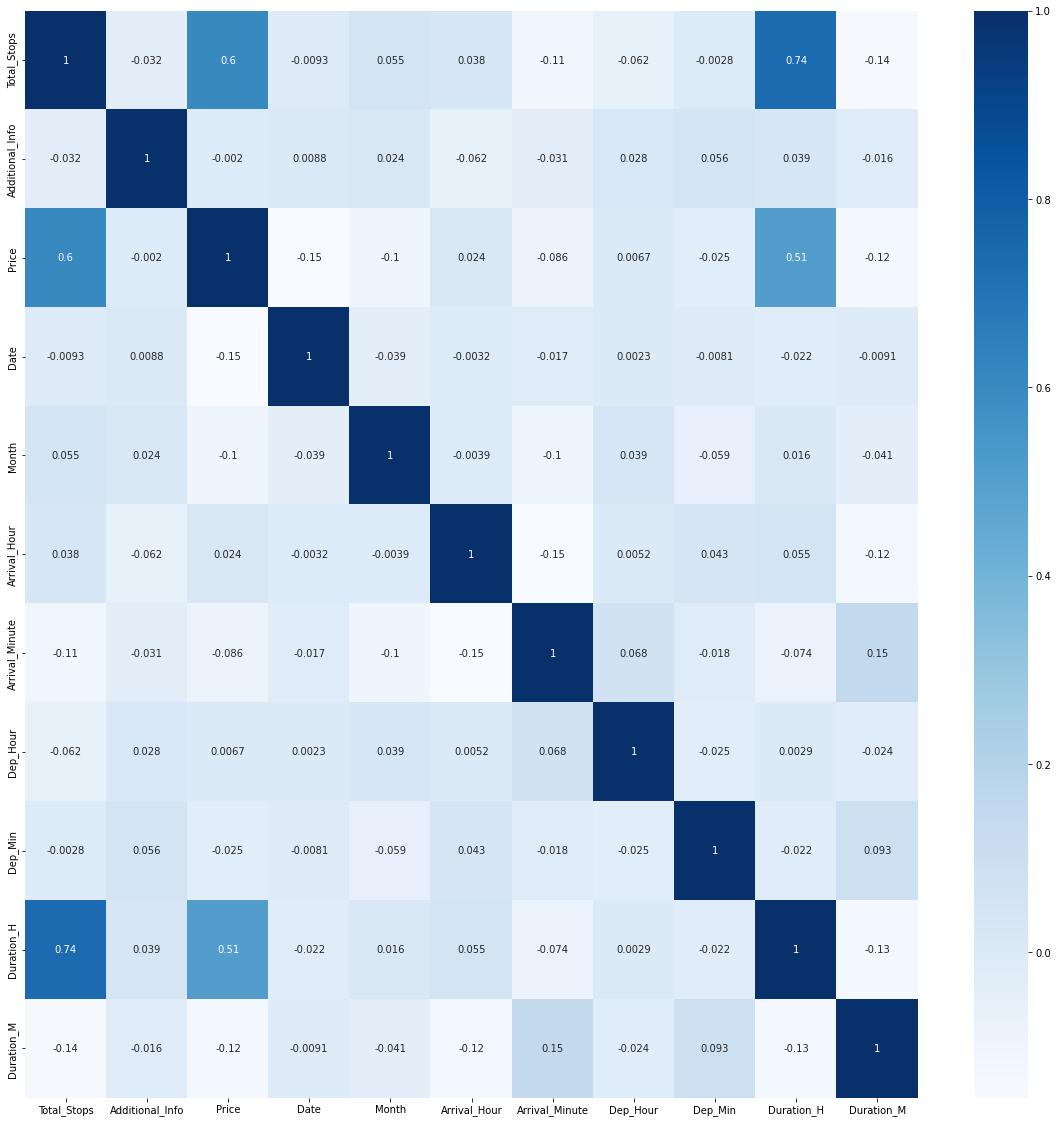

In [ ]:
#plotting heatmap to check correlation


plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(), annot=True, cmap="Blues")
plt.show()

We observe that here are no higly correlated features.
Therefore all the present features are important.



In [ ]:
len(data.columns.unique())

30

In [ ]:
data.shape

(10682, 30)

In [ ]:
#Saving the Processed data into an Excel sheet
data.to_csv(r'/content/drive/MyDrive/Colab Notebooks/Flight Price Prediction Notebook/Flight_processed1.csv')

**Splitting the Data into Independent and Dependent Feature**


In [ ]:
X=data.drop('Price',axis=1)

In [ ]:
y=data['Price']

In [ ]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8545, 30), (2137, 30), (8545,), (2137,))

# Fitting the Model

In [ ]:
#Taking multiple models to check which gives the best result
models = [['LogisticRegression :', LogisticRegression()],
          ['Lasso : ', Lasso()],
          ['Ridge : ', Ridge()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()],
          ['XGBRegressor : ', XGBRegressor()]]

In [ ]:
#fitting the models and checking MSE value
for model_name, model in models:
    model=model
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    print(model_name)
    print('MSE of '+model_name, (np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print('\n')
   

  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression :
MSE of LogisticRegression : 4961.954329674016


Lasso : 
MSE of Lasso :  3097.2118855308195


Ridge : 
MSE of Ridge :  3053.511060846312


KNeighborsRegressor : 
MSE of KNeighborsRegressor :  4888.9554779063865


DecisionTreeRegressor : 
MSE of DecisionTreeRegressor :  2136.604994752933


RandomForestRegressor : 
MSE of RandomForestRegressor :  1662.2005358843994


GradientBoostingRegressor : 
MSE of GradientBoostingRegressor :  2166.1071423971985


[18:20:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor : 
MSE of XGBRegressor :  2187.6865903301223




We Observe that **RandomForest Regressor** performs well.


MSE : 1662.20

Hence selecting that model.

# Hyperparameter Tuning

In [ ]:
param = {
        
            'n_estimators' : [100,200,300,400,500],
            'max_depth' : [3,5,8,11,13,15,18],
            'max_features' : ["auto", "sqrt"],
            'min_samples_split' : [2,4,6,8,10],
            'min_samples_leaf' :[2,5,7,9]
        
}

In [ ]:
random = RandomizedSearchCV(estimator =RandomForestRegressor(), param_distributions = param,random_state=3,n_iter=20,cv = 3, n_jobs=-1, verbose=2)
random.fit(X_train, y_train)



Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 8, 11, 13, 15, 18],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 7, 9],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=3, verbose=2)

In [ ]:
#Best parameters
random.best_params_

{'max_depth': 18,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 500}

In [ ]:
regressor=RandomForestRegressor(max_depth=18,max_features='auto',min_samples_leaf=2,min_samples_split=8,n_estimators=500)
regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=18, min_samples_leaf=2, min_samples_split=8,
                      n_estimators=500)

In [ ]:
prediction = regressor.predict(X_test)
print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))


RMSE : 1617.282605100485


After Hyperparameter Tuning, we observe that the MSE value has decreased

# Saving the Model

In [ ]:
import pickle

# open a file
file = open('Flightfare_predictor.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)

In [ ]:
from google.colab import files 
files.download("Flightfare_predictor.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = open("/content/drive/MyDrive/Colab Notebooks/Flight Price Prediction Notebook/Flightfare_predictor.pkl",'rb')
randomforest = pickle.load(model)


In [ ]:
y_prediction = randomforest.predict(X_test)


In [ ]:
#R Square value of Regression Model
metrics.r2_score(y_test, y_prediction)


0.8859909381576676

In [ ]:
#Accuracy of the Training and Test Data
print("Training data Accuracy : ", regressor.score(X_train,y_train))
print("Test data Accuracy : ", regressor.score(X_test,y_test))

Training data Accuracy :  0.9468412108949884
Test data Accuracy :  0.8859909381576676
